In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime as dt

from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import learning_curve, train_test_split

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from tqdm import tqdm

import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


## Load dataset

In [2]:
df = pd.read_csv('../Dataset/FPT.csv')

In [3]:
df = df.sort_values(by='date', ascending=True).reset_index(drop=True)

In [4]:
df

,date,close,volume,open,high,low
0,2006-12-13,11.4372,83530,11.4372,11.4372,11.4372
1,2006-12-14,12.0091,280710,12.0091,12.0091,12.0091
2,2006-12-15,12.6095,265300,12.6095,12.6095,12.6095
3,2006-12-18,13.2386,215790,13.2386,13.2386,13.2386
4,2006-12-19,13.8962,137520,13.8962,13.8962,13.8962
...,...,...,...,...,...,...
4573,2025-04-23,110.4000,5710800,111.7000,111.7000,107.7000
4574,2025-04-24,112.0000,7740100,111.5000,113.7000,110.6000
4575,2025-04-25,112.4000,5384100,112.0000,112.4000,110.2000
4576,2025-04-28,109.5000,3853700,112.0000,112.4000,109.2000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4578 entries, 0 to 4577
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4578 non-null   object 
 1   close   4578 non-null   float64
 2   volume  4578 non-null   int64  
 3   open    4578 non-null   float64
 4   high    4578 non-null   float64
 5   low     4578 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 214.7+ KB


In [6]:
df.describe()


,close,volume,open,high,low
count,4578.000000,4.578000e+03,4578.000000,4578.000000,4578.000000
mean,26.421050,1.172694e+06,26.414890,26.697035,26.148572
std,33.127026,1.558003e+06,33.116514,33.459368,32.785950
min,2.106800,0.000000e+00,2.045554,2.154980,2.045554
25%,6.072000,2.500675e+05,6.093807,6.135568,6.046381
50%,11.192700,6.459900e+05,11.192703,11.295904,11.078595
75%,25.579700,1.540285e+06,25.567024,25.832963,25.420804
max,154.300000,2.157450e+07,154.100000,156.000000,153.400000


## Data Cleaning

In [7]:
df["date"] = pd.to_datetime(df["date"], format = "%Y-%m-%d")
df = df.dropna()

## Data Visualization

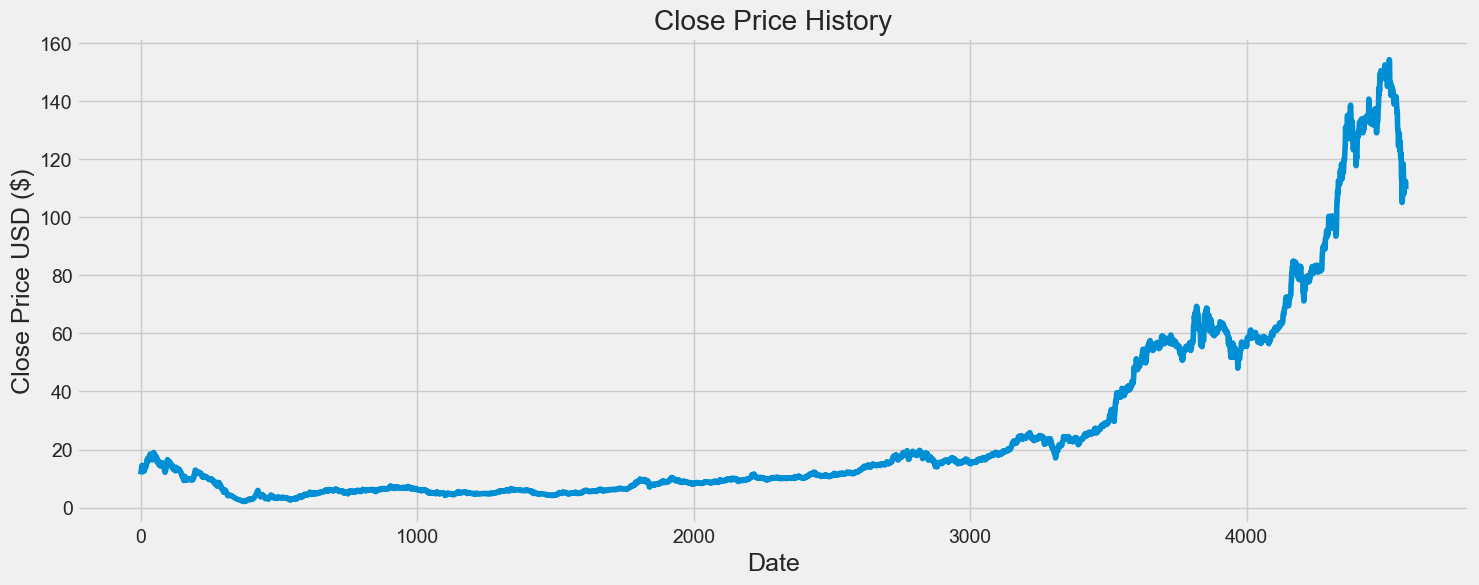

In [8]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [9]:
# Create a new dataframe
data = df.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values

In [10]:
# scaler = MinMaxScaler(feature_range=(0,1))
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[-0.45236438],
       [-0.43509865],
       [-0.41697249],
       ...,
       [ 2.59571575],
       [ 2.50816437],
       [ 2.50514535]], shape=(4578, 1))